<a href="https://colab.research.google.com/github/Thingjae9/Section1_OwnProject/blob/main/Section_1_Project_%EC%9B%90%EB%AA%85%EC%9E%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import scipy.stats as st
from scipy.stats import t
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [4]:
# 데이터 불러오기 
df = pd.read_csv('vgames2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [5]:
# 데이터 전처리
df.sample(5)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13778,13779,Grand Theft Auto,PS,1997.0,Action,Take-Two Interactive,0.79,1.35,0.04,0.14
14124,14125,Momotaro Douchuuki,SAT,1997.0,Misc,Hudson Soft,0,0,0.13,0
16445,16446,Hot Shots Golf: Out of Bounds,PS3,2007.0,Sports,Sony Computer Entertainment,0.31,0.03,0.76,0.04
6938,6939,Serious Sam Advance,GBA,2004.0,Shooter,Global Star,0.02,0.01,0,0
3595,3596,The Land Before Time: Great Valley Racing Adve...,PS,2001.0,Racing,TDK Mediactive,0.05,0.04,0,0.01


In [6]:
# unnamed 드랍
# year - > int형으로 변환
# *_Sales - > K 나 M, B등의 단위로 혼란. 함수를 통해 수정하도록 설계

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)

In [8]:
# 결측지 제거
df = df.dropna()

In [9]:
df['Year'] = df.Year.astype('int')

In [10]:
df[df['Platform'] == 'Wii'].head()

# Wii의 판매량을 검색을 통해 판매량의 단위가 M인것을 확인

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
35,G-Force,Wii,2009,Action,Disney Interactive Studios,0.19,0.2,0,0.05
38,Ninja Reflex,Wii,2008,Action,Electronic Arts,0.11,0.01,0,0.01
51,Chaotic: Shadow Warriors,Wii,2009,Action,Activision,0.18,0,0,0.01
55,SpongeBob's Boating Bash,Wii,2010,Misc,THQ,0.25,0.07,0,0.03


In [11]:
# 함수설계 K가 붙은값은 /1000  B가 붙은값은 그대로 float형으로 배출
def str_to_float(data):
  str_need_change = data
  if 'K' in str_need_change:
    str_need_change.replace('K', '')
    str_need_change = float(str_need_change.replace('K', ''))
    return str_need_change/1000
  elif 'M' in str_need_change:
    str_need_change = str_need_change.replace('M', '')
    return float(str_need_change)
  else:
    return float(str_need_change)

# 사용 근거로 Wii 항목의 NA_Sales

In [12]:
df['NA_Sales'] = df.NA_Sales.apply(str_to_float)
df['EU_Sales'] = df.EU_Sales.apply(str_to_float)
df['JP_Sales'] = df.JP_Sales.apply(str_to_float)
df['Other_Sales'] = df.Other_Sales.apply(str_to_float)

In [13]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,1994.178437,0.265195,0.147378,0.078283,0.048234
std,155.484265,0.822431,0.508340,0.309272,0.189678
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000
max,2020.000000,41.490000,29.020000,10.220000,10.570000


In [14]:
df.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16358,Taito Legends 2,PS2,2006,Misc,Empire Interactive,0.01,0.01,0.00,0.00
14564,Ben 10 Alien Force: Vilgax Attacks,Wii,2009,Action,D3Publisher,0.25,0.15,0.00,0.04
14054,Omega Boost,PS,1999,Shooter,Sony Computer Entertainment,0.17,0.11,0.20,0.03
4223,Famicom Mini: Famicom Mukashi Banashi - Shin O...,GBA,2004,Adventure,Nintendo,0.00,0.00,0.08,0.00
8511,WCW vs the World,PS,1998,Fighting,THQ,1.17,0.20,0.04,0.05


In [15]:
df.shape

(16241, 9)

In [16]:
# 전처리 마무리
df.drop_duplicates(inplace=True)
print(df.shape,'\n',df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB
(16241, 9) 
 None


In [17]:
# 1
# 지역에 따른 선호하는 게임 장르
# 게임 장르에 따른 판매량을 확인하는 것이 좋아보임.

In [18]:
Sum_Genre = df.groupby('Genre').sum()
Sum_Genre.drop(['Year'],axis=1,inplace=True)
print(Sum_Genre.columns)
print(Sum_Genre)
print(Sum_Genre.index)

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')
              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          858.75    513.64    156.60       183.99
Adventure       101.79     63.66     51.87        16.70
Fighting        220.35     99.90     87.14        36.15
Misc            394.73    208.15    104.18        72.64
Platform        445.38    200.63    130.53        51.45
Puzzle          121.58     50.47     56.24        12.44
Racing          354.70    235.02     56.32        76.51
Role-Playing    318.76    183.09    342.93        56.73
Shooter         574.48    310.23     38.18       101.86
Simulation      181.43    112.99     63.54        31.32
Sports          667.26    370.97    134.76       132.35
Strategy         67.83     44.82     49.10        11.23
Index(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
 

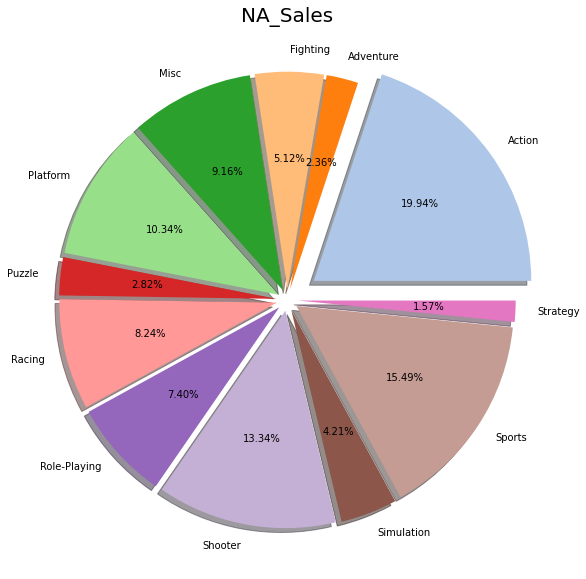

In [19]:
# NA - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('NA_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['NA_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

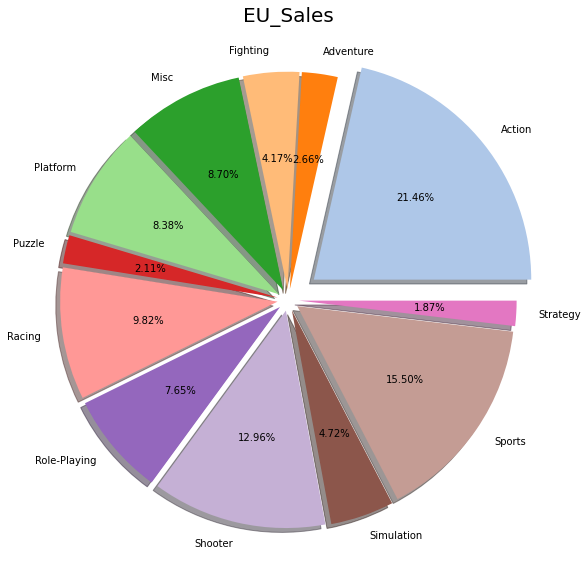

In [20]:
# EU - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('EU_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['EU_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

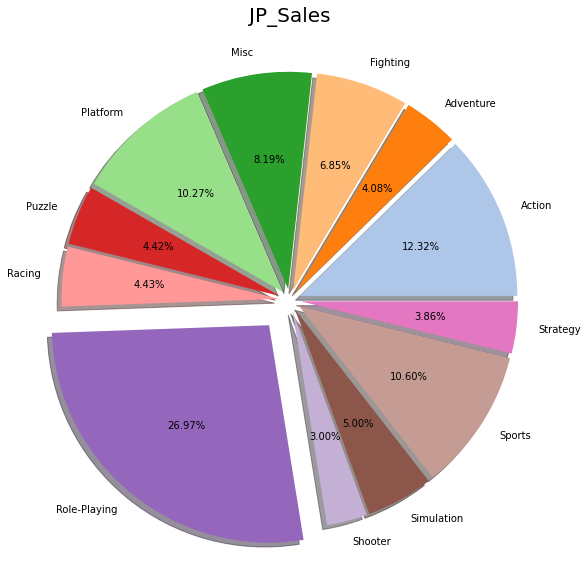

In [21]:
# JP - Role Playing이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('JP_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['JP_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

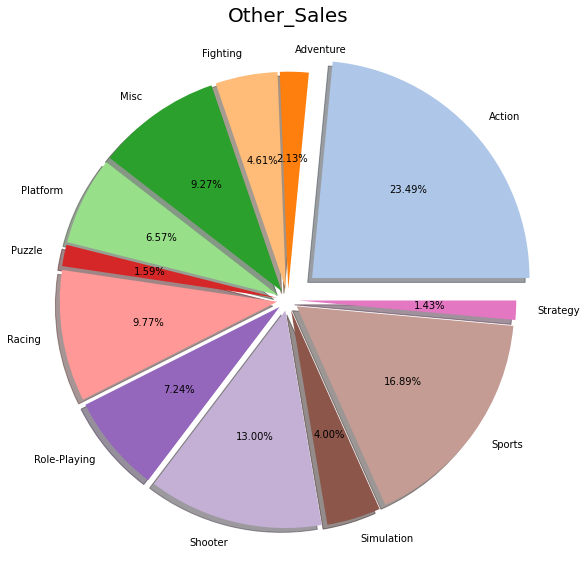

In [22]:
# Other - Action이 제일큼
label = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy']
cmap = plt.get_cmap("tab20")
explode = [0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.figure(figsize=(10, 10))
plt.title('Other_Sales',size=20)
colors = cmap(np.array([1,2,3,4,5,6,7,8,9,10,11,12]))
plt.pie(Sum_Genre['Other_Sales'], labels = label, colors = colors, autopct='%.2f%%',explode=explode, shadow=True)
plt.show()

In [23]:
# Pie chart를 통해 시각화해본 결과 
# 기타국가와 NA, EU는 Action을 가장 선호
# JP 특이하게 Role-Playing을 가장 선호했다.

# 따라서 JP를 제외하곤 양상이 비슷하게 선호했고 
# 아시아 국가만 특이하게 선호하는 게임의 장르 양상이 다른 것으로 판명

In [24]:
# 기본적으로 Sales의 양을 기준으로 트렌드한 제품은
# 다른 제품에 비해 많이 팔리는 것으로 추측. 
# 가장 큰 기준 -> 타제품 대비 판매량

# 연도별 게임트렌드 나누는 방식은 2가지가 있을 것으로 계산
# 1. 장르의 연도별 흐름.
# 2. 플랫폼에 따른 연도별 흐름.

# 국가별은 1번 Q에서 진행했기 때문에 Sum한 값을 칼럼으로 생성해서 계산하는 방식

df['Sum_Sales'] = df['NA_Sales'] + df ['EU_Sales'] + df ['JP_Sales'] + df ['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [25]:
Year_group = df.groupby('Year').sum()
Year_group.sample(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sum_Sales
Year,,,,,
1,1.11,0.87,0.00,0.29,2.27
2011,233.79,163.62,52.67,53.25,503.33
95,0.00,0.00,1.40,0.03,1.43
11,6.58,3.55,0.31,1.08,11.52
2008,349.58,182.97,60.23,81.46,674.24
2005,240.71,121.52,53.76,40.48,456.47
98,0.77,0.20,0.55,0.02,1.54
7,0.39,0.03,0.00,0.03,0.45
2006,258.37,128.46,71.37,52.37,510.57


In [26]:
# Year 값이 이상한 것을 확인 -> df Year 이상치 수정필요
# 22을기준으로 큰 것은 19XX / 22보다 작은 것은 20XX 로 수정필요하다고 생각함.

def cont_Year(year):
  if year < 100:
    if year > 22:
      return 1900+year
    else:
      return 2000+year
  else:
    return year


df['Year_new'] = df.Year.apply(cont_Year)

In [27]:
plat_Year = df.groupby(['Year_new','Platform'])['Sum_Sales'].sum().unstack('Platform').fillna(0)
plat_Year.head(10)

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year_new,,,,,,,,,,,,,,,,,,,,,
1980,10.88,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981,35.68,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982,28.88,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983,5.84,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.27,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.45,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.67,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,1.94,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,0.74,0.0,0.0,0.0,0.00,1.43,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 80년대 트랜드 
plat_Year_T = plat_Year.T
trand1 = plat_Year_T.idxmax(axis=0)
print(trand1) # platform 트랜드 변화 보기 

Year_new
1980    2600
1981    2600
1982    2600
1983     NES
1984     NES
1985     NES
1986     NES
1987     NES
1988     NES
1989      GB
1990    SNES
1991    SNES
1992    SNES
1993    SNES
1994    SNES
1995      PS
1996      PS
1997      PS
1998      PS
1999      PS
2000      PS
2001     PS2
2002     PS2
2003     PS2
2004     PS2
2005     PS2
2006     Wii
2007     Wii
2008     Wii
2009     Wii
2010    X360
2011     PS3
2012     PS3
2013     PS3
2014     PS4
2015     PS4
2016     PS4
2017     PS4
2020      DS
dtype: object


In [29]:
genre_Year = df.groupby(['Year_new','Genre'])['Sum_Sales'].sum().unstack('Genre').fillna(0)
genre_Year.head(10)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year_new,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.0
1981,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.0
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.0
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.0
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.0
1985,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.0
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.0
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.0
1988,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.0


In [30]:
genre_Year_T = genre_Year.T
trand2 = genre_Year_T.idxmax(axis=0)
print(trand2) # 장르 트랜드 변화 보기

Year_new
1980         Shooter
1981          Action
1982          Puzzle
1983        Platform
1984         Shooter
1985        Platform
1986          Action
1987        Fighting
1988        Platform
1989          Puzzle
1990        Platform
1991        Platform
1992        Fighting
1993        Platform
1994        Platform
1995        Platform
1996    Role-Playing
1997          Racing
1998          Sports
1999    Role-Playing
2000          Sports
2001          Action
2002          Action
2003          Action
2004          Action
2005          Action
2006          Sports
2007          Action
2008          Action
2009          Sports
2010          Action
2011          Action
2012          Action
2013          Action
2014          Action
2015          Action
2016          Action
2017    Role-Playing
2020      Simulation
dtype: object


In [31]:
see_gen = df.groupby(['Year_new','Genre']).sum()

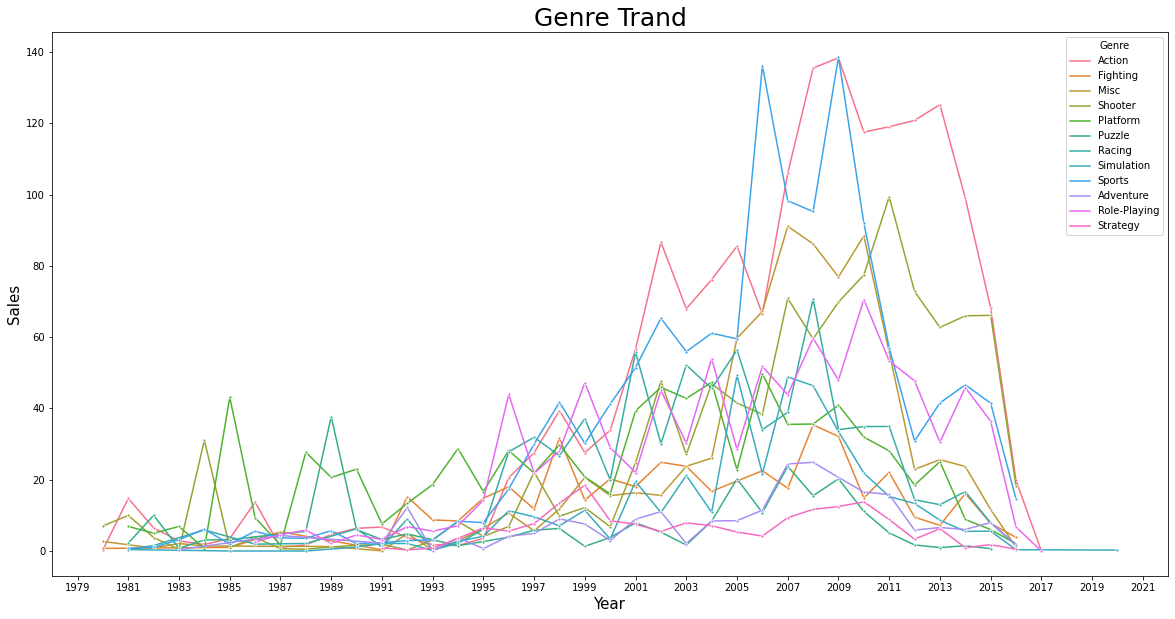

In [32]:
# 시각화

plt.figure(figsize=(20, 10)) 
plt.title('Genre Trand',size=25)
plt.xlabel('Year',size=15)
plt.ylabel('Sales',size=15)
plt.xticks(np.arange(1979,2023,2))
sns.lineplot(data = see_gen, x='Year_new',y='Sum_Sales',hue='Genre',marker='.')

In [40]:
Publisher_Year = df.groupby(['Year_new','Publisher'])['Sum_Sales'].sum().unstack('Publisher').fillna(0)
Publisher_Year_T = Publisher_Year.T
trand3 = Publisher_Year_T.idxmax(axis=0)
print(trand3) # 회사 트랜드 변화 보기

Year_new
1980                          Atari
1981                     Activision
1982                          Atari
1983                       Nintendo
1984                       Nintendo
1985                       Nintendo
1986                       Nintendo
1987                       Nintendo
1988                       Nintendo
1989                       Nintendo
1990                       Nintendo
1991                       Nintendo
1992                       Nintendo
1993                       Nintendo
1994                       Nintendo
1995    Sony Computer Entertainment
1996                       Nintendo
1997    Sony Computer Entertainment
1998                       Nintendo
1999                       Nintendo
2000                       Nintendo
2001                       Nintendo
2002                Electronic Arts
2003                Electronic Arts
2004                Electronic Arts
2005                       Nintendo
2006                       Nintendo
2007               

In [42]:
Name_Year = df.groupby(['Year_new','Name'])['Sum_Sales'].sum().unstack('Name').fillna(0)
Name_Year_T = Name_Year.T
trand4 = Name_Year_T.idxmax(axis=0)
print(trand4) # 이름 트랜드 변화 보기

Year_new
1980                                           Asteroids
1981                                            Pitfall!
1982                                             Pac-Man
1983                                            Baseball
1984                                           Duck Hunt
1985                                   Super Mario Bros.
1986                                 The Legend of Zelda
1987                     Zelda II: The Adventure of Link
1988                                 Super Mario Bros. 3
1989                                              Tetris
1990                                   Super Mario World
1991             The Legend of Zelda: A Link to the Past
1992                  Super Mario Land 2: 6 Golden Coins
1993                               Super Mario All-Stars
1994                                 Donkey Kong Country
1995           Donkey Kong Country 2: Diddy's Kong Quest
1996                            Pokemon Red/Pokemon Blue
1997                  

In [43]:
Trand = pd.concat([trand1,trand2,trand3,trand4],axis=1)
Trand

,0,1,2,3
Year_new,,,,
1980,2600,Shooter,Atari,Asteroids
1981,2600,Action,Activision,Pitfall!
1982,2600,Puzzle,Atari,Pac-Man
1983,NES,Platform,Nintendo,Baseball
1984,NES,Shooter,Nintendo,Duck Hunt
1985,NES,Platform,Nintendo,Super Mario Bros.
1986,NES,Action,Nintendo,The Legend of Zelda
1987,NES,Fighting,Nintendo,Zelda II: The Adventure of Link
1988,NES,Platform,Nintendo,Super Mario Bros. 3


In [35]:
# 플랫폼의 트랜드 변화
# 2600 > NES > GB > SNES > PS > PS2 > Wii > X360 > PS3

# 장르의 트랜드 변화 
# 트랜드의 변화 잦음
# 90년대 중반 > Plaform이 가장 많음 
# 90년대 이후 > 메인은 Action인 것으로 보이고 다음으로 Sports, Role-Playing임.

# 추가로 회사도 분석해봤음.
# Nintendo, Electronic Arts 두 회사가 시장을 장악한 것으로 보임.

In [36]:
# 내일 추가로 진행해볼 것 - > 클러스터 분류?

# 추가로 해결해야하는 사항 > 다음 분기, 회사의 규모, ?

In [38]:
# 게임회사의 흐름
# 모바일 게임을 통해 알아본 것은
# Pay to win - > Pay to fun으로 흐름이 변하고 있음.

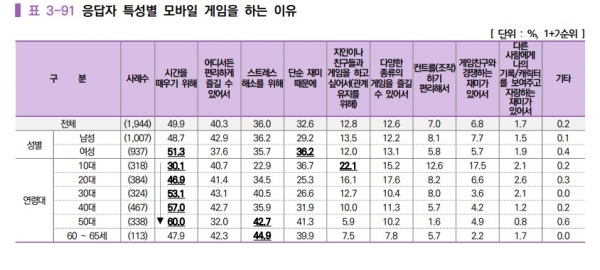https://cdn.khgames.co.kr/news/photo/202110/131367_109719_1934.jpg

In [49]:
# 아마존에서 Imagine: Makeup Artist 게임 검색 결과
# ( 2022 년 게임이 1개인 것을 확인했기 때문 )
# February 17, 2009로 확인

df[df['Name']=='Imagine: Makeup Artist'].index

Int64Index([6906], dtype='int64')

In [53]:
df.loc[6906,'Year_new'] = 2009
# 앞의 것 다시진행

Genre_Year = df.groupby(['Year_new','Genre'])['Sum_Sales'].sum().unstack('Genre').fillna(0)
Genre_Year_T = Genre_Year.T
trand1 = Genre_Year_T.idxmax(axis=0)
Platform_Year = df.groupby(['Year_new','Platform'])['Sum_Sales'].sum().unstack('Platform').fillna(0)
Platform_Year_T = Platform_Year.T
trand2 = Platform_Year_T.idxmax(axis=0)
Publisher_Year = df.groupby(['Year_new','Publisher'])['Sum_Sales'].sum().unstack('Publisher').fillna(0)
Publisher_Year_T = Publisher_Year.T
trand3 = Publisher_Year_T.idxmax(axis=0)
Name_Year = df.groupby(['Year_new','Name'])['Sum_Sales'].sum().unstack('Name').fillna(0)
Name_Year_T = Name_Year.T
trand4 = Name_Year_T.idxmax(axis=0)
Trand = pd.concat([trand1,trand2,trand3,trand4],axis=1)
Trand
# 0은 장르 1은 게임 플랫폼 2는 회사 3은 게임 이름

,0,1,2,3
Year_new,,,,
1980,Shooter,2600,Atari,Asteroids
1981,Action,2600,Activision,Pitfall!
1982,Puzzle,2600,Atari,Pac-Man
1983,Platform,NES,Nintendo,Baseball
1984,Shooter,NES,Nintendo,Duck Hunt
1985,Platform,NES,Nintendo,Super Mario Bros.
1986,Action,NES,Nintendo,The Legend of Zelda
1987,Fighting,NES,Nintendo,Zelda II: The Adventure of Link
1988,Platform,NES,Nintendo,Super Mario Bros. 3


In [57]:
Trand.shape

(38, 4)

In [56]:
Publisher = df.groupby(['Publisher'])['Sum_Sales'].sum()
Publisher.describe()

# 회사의 규모 확인. 
# 앞에 분석한 트랜드로 Electronic Arts 또는 Nintentdo 회사가 주를 장악함.

count     575.000000
mean       15.226730
std       101.993827
min         0.010000
25%         0.070000
50%         0.320000
75%         1.645000
max      1759.580000
Name: Sum_Sales, dtype: float64

In [ ]:
# 앞서 분석한 Trand의 변화를 통해 4~6년 주기로 Platform의 Trand가 바뀌는 것을 확인함

# 따라서 2018 ~ 2023 년의 트랜드를 예측함.

In [58]:
# 가설 : 내년에 장르가 바뀌고 그 장르가 액션임.
# 내년에 장르가 바뀔 확률 : 23/37
# 장르가 Action인 확률 : 16/38

P = 23/37
no_Ac = 1 - 16/38
Ac = 16/38
error = P*Ac / (no_Ac*P + P*Ac)
error

0.42105263157894735

In [ ]:
# 42퍼센트로 장르가 바뀌었을 때 Action임을 확인.